# **Projek Ujian Tengah Semester - Mata Kuliah Visualisasi Data**

Nama : Kurniadi Ahmad Wijaya

NIM  : 1301194024

Kelas : IF-43-09

## **Import Library**

In [123]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

mpl.rc('xtick', labelsize=11)
mpl.rc('ytick', labelsize=11)
mpl.style.use(['ggplot'])

warnings.filterwarnings("ignore")

### **Exploratory Data Analysis (EDA)**

In [124]:
df1 = pd.read_csv('Data Set 1.csv')
df2 = pd.read_csv('Data Set 2.csv')

In [125]:
print(f'Total Data 1 : {len(df1)}')
df1.tail()

Total Data 1 : 30


,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
25,27-Mar-20,1439,5775,153,1046,4729,0,913
26,28-Mar-20,491,6266,109,1155,5111,0,994
27,29-Mar-20,268,6534,130,1285,5249,0,1107
28,30-Mar-20,129,6663,129,1414,5249,0,1217
29,31-Mar-20,114,6777,114,1528,5249,0,1311


In [126]:
print(f'Total Data 2 : {len(df2)}')

df2.rename(columns={"province_name": "Nama Provinsi"}, inplace=True)
df2.head()

Total Data 2 : 34


,province_id,Nama Provinsi,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [127]:
df1.isna().sum()

date             0
new_tested       0
acc_tested       0
new_confirmed    0
acc_confirmed    0
acc_negative     0
being_checked    0
isolated         0
dtype: int64

In [128]:
df2.isna().sum()


province_id            0
Nama Provinsi          0
island                 0
iso_code               0
capital_city           0
population             0
population_kmsquare    0
confirmed              0
deceased               0
released               0
longitude              0
latitude               0
dtype: int64

## **Soal 1 (10 point)**
Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel,
terkonfirmasi positif dan terkonfirmasi negatif 
untuk periode waktu yang tersedia

### **Menambahkan Kolom Untuk Format Hari**


In [129]:
def get_date(date):
    return int(date[:2])

In [130]:
soal1 = df1[['date', 'acc_tested', 'acc_confirmed', 'acc_negative']]
soal1['Tanggal'] = soal1['date'].apply(get_date)
soal1.set_index('Tanggal', inplace=True)
soal1.head()

,date,acc_tested,acc_confirmed,acc_negative
Tanggal,,,,
2,02-Mar-20,339,2,335
3,03-Mar-20,341,2,337
4,04-Mar-20,372,2,356
5,05-Mar-20,388,2,371
6,06-Mar-20,450,4,422


### **Memvisualisasikan Lineplot**


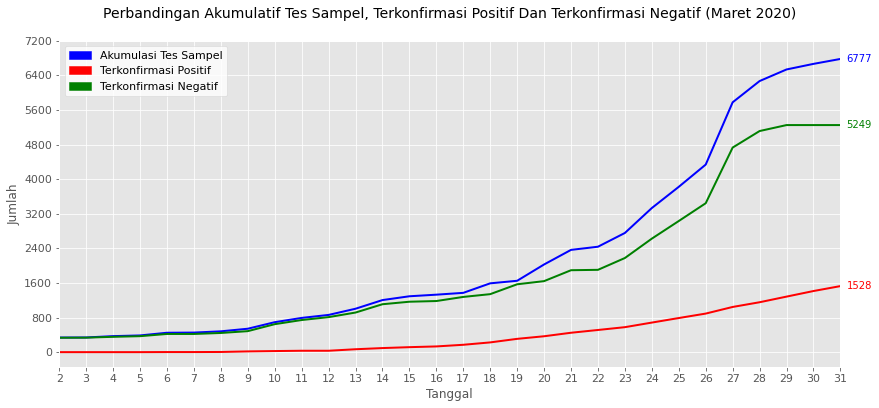

In [131]:
ax = soal1.plot(kind='line', figsize=(14, 6), linewidth=2, fontsize=11)
ax.set_xlim([2, 31])
ax.set_xticks(np.arange(2, 32, 1))
ax.set_yticks(np.arange(0, 7500, 800))

blue_patch = mpatches.Patch(color='blue', label='Akumulasi Tes Sampel')
red_patch = mpatches.Patch(color='red', label='Terkonfirmasi Positif')
green_patch = mpatches.Patch(color='green', label='Terkonfirmasi Negatif')

plt.legend(facecolor="white", handles=[blue_patch, red_patch, green_patch], fontsize=11)
plt.title("Perbandingan Akumulatif Tes Sampel, Terkonfirmasi Positif Dan Terkonfirmasi Negatif (Maret 2020)", fontsize=14, pad=16, y=1.02)

plt.xlabel('Tanggal')
plt.ylabel('Jumlah')

plt.gca().get_lines()[0].set_color("blue")
plt.gca().get_lines()[1].set_color("red")
plt.gca().get_lines()[2].set_color("green")

for line, name in zip(ax.lines, [6777, 1528, 5249]):
    y = line.get_ydata()[-1]

    ax.annotate(
        name, xy=(1, y), xytext=(6, 0),
        color=line.get_color(), xycoords=ax.get_yaxis_transform(),
        textcoords="offset points", size=10, va="center"
    )

plt.show()


## **Soal 2 (30 poin)**
• Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.

- Positive rate = (Jumlah terkonfirmasi positif / Jumlah tes sampel) × 100%

- Negative rate = (Jumlah terkonfirmasi negatif / Jumlah tes sampel) × 100%

• Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan negativity rate untuk periode waktu yang tersedia.

• Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?

• Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

### **Menghitung Persentase Positive Dan Negative Rate**

In [132]:
def count_rate(rate, name):
    return 100 * (rate[name] / rate['acc_tested'])

In [133]:
soal2 = df1.copy()
soal2['Rate Positive'] = df1.apply(count_rate, name='acc_confirmed', axis=1)
soal2['Rate Negative'] = df1.apply(count_rate, name='acc_negative', axis=1)

soal2.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,Rate Positive,Rate Negative
0,02-Mar-20,339,339,2,2,335,2,2,0.589971,98.820059
1,03-Mar-20,2,341,0,2,337,2,2,0.586510,98.826979
2,04-Mar-20,31,372,0,2,356,14,2,0.537634,95.698925
3,05-Mar-20,16,388,0,2,371,15,2,0.515464,95.618557
4,06-Mar-20,62,450,2,4,422,24,4,0.888889,93.777778


### **Merubah Format Tanggal Dan Sorting Berdasarkan Tanggal Secara Ascending**

In [134]:
soal2 = soal2[['Rate Positive', 'Rate Negative']]
soal2['Tanggal'] = df1['date'].apply(get_date)
soal2.sort_values(by='Tanggal', ascending=False, inplace=True)

In [135]:
soal2_index = soal2.set_index('Tanggal')
soal2_index.head()

,Rate Positive,Rate Negative
Tanggal,,
31,22.546850,77.453150
30,21.221672,78.778328
29,19.666361,80.333639
28,18.432812,81.567188
27,18.112554,81.887446


### **Memvisualisasikan Perbandingan Nilai Positive Dan Negative Rate Pada Barplot**

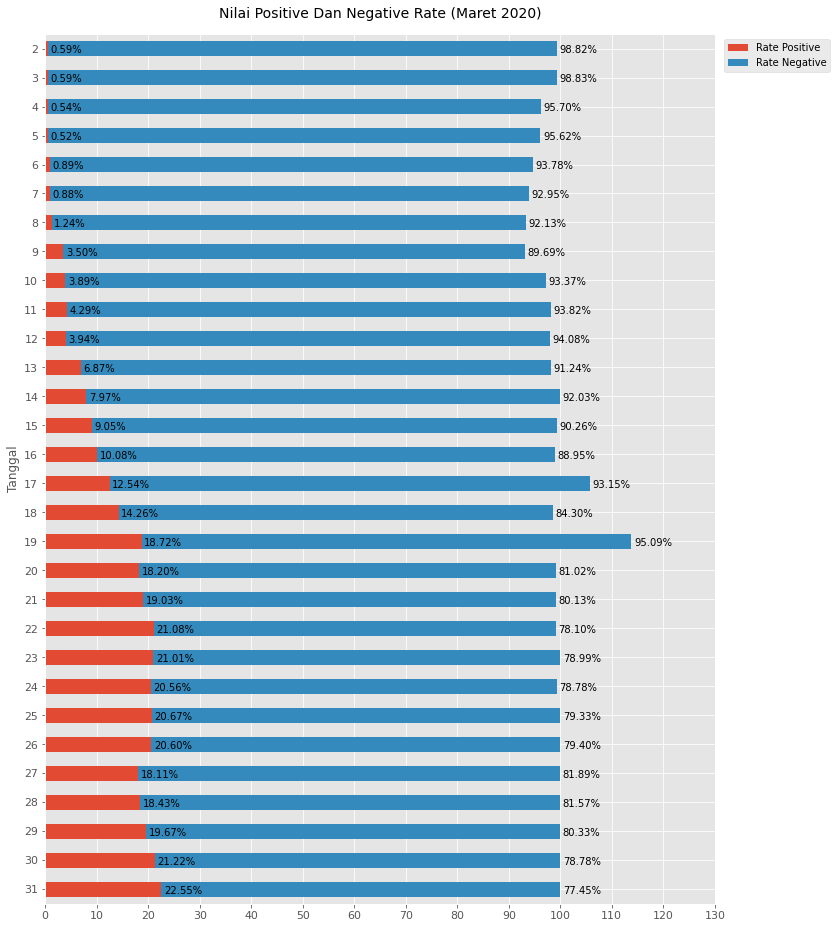

In [136]:
ax = soal2_index.plot(kind='barh', stacked=True, figsize=(12, 16), xlabel='Tanggal', ylabel='Persentase')
ax.set_xticks(np.arange(0, 135, 10))

for i, p in enumerate(ax.patches):
    percentage = '{:.2f}%'.format(p.get_width())
    x = p.get_x() + p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2 - 0.15
    ax.annotate(percentage, (x, y))

plt.legend(bbox_to_anchor=(1.18, 1))
plt.title("Nilai Positive Dan Negative Rate (Maret 2020)", fontsize=14, pad=16)
plt.show()


### **Sorting Nilai Positive Rate Tertinggi Dan Menampilkannya**

In [137]:
highest_positif = soal2.sort_values(by='Rate Positive', ascending=False)
highest_positif[['Rate Positive', 'Tanggal']].head()

,Rate Positive,Tanggal
29,22.546850,31
28,21.221672,30
20,21.082855,22
21,21.008708,23
23,20.669806,25


### **Sorting Nilai Negative Rate Tertinggi Dan Menampilkannya**


In [138]:
highest_negative = soal2.sort_values(by='Rate Negative', ascending=False)
highest_negative[['Rate Negative', 'Tanggal']].head()

,Rate Negative,Tanggal
1,98.826979,3
0,98.820059,2
2,95.698925,4
3,95.618557,5
17,95.093882,19


## **Soal 3 (20 poin)**

• Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada
dataset.

• Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan
penjelasan terkait nilai korelasi tersebut.

• Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan
penjelasan terkait nilai korelasi tersebut

### **Menampilkan Heatmap Korelasi Antar Kolom**

In [139]:
df1.corr()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
new_tested,1.000000,0.529012,0.681682,0.488240,0.541540,-0.402717,0.494872
acc_tested,0.529012,1.000000,0.927075,0.992487,0.999088,-0.611367,0.992602
new_confirmed,0.681682,0.927075,1.000000,0.925703,0.929067,-0.504804,0.928491
acc_confirmed,0.488240,0.992487,0.925703,1.000000,0.987653,-0.599737,0.999920
acc_negative,0.541540,0.999088,0.929067,0.987653,1.000000,-0.613971,0.987858
being_checked,-0.402717,-0.611367,-0.504804,-0.599737,-0.613971,1.000000,-0.600341
isolated,0.494872,0.992602,0.928491,0.999920,0.987858,-0.600341,1.000000


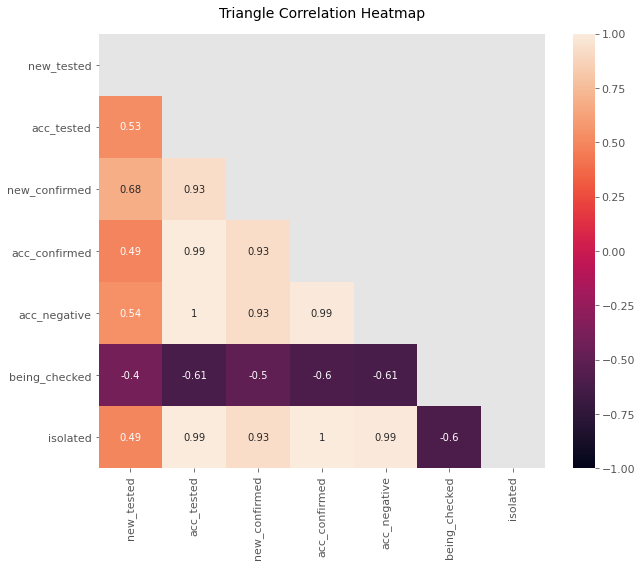

In [140]:
plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(df1.corr(), mask=np.triu(np.ones_like(df1.corr())), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 14}, pad=16)

plt.show()

### **Membuat Series Korelasi Antar Kolom**

In [141]:
corr_sort = (
    df1.corr()
        .where(np.triu(np.ones(df1.corr().shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
)

corr_sort

acc_confirmed  isolated         0.999920
acc_tested     acc_negative     0.999088
               isolated         0.992602
               acc_confirmed    0.992487
acc_negative   isolated         0.987858
acc_confirmed  acc_negative     0.987653
new_confirmed  acc_negative     0.929067
               isolated         0.928491
acc_tested     new_confirmed    0.927075
new_confirmed  acc_confirmed    0.925703
new_tested     new_confirmed    0.681682
               acc_negative     0.541540
               acc_tested       0.529012
               isolated         0.494872
               acc_confirmed    0.488240
               being_checked   -0.402717
new_confirmed  being_checked   -0.504804
acc_confirmed  being_checked   -0.599737
being_checked  isolated        -0.600341
acc_tested     being_checked   -0.611367
acc_negative   being_checked   -0.613971
dtype: float64

### **Melakukan Pemilihan Dan Sorting Data Untuk Korelasi Negative Dan Positive Tertinggi**

In [142]:
corr_positive = corr_sort.head()
corr_negative = corr_sort.tail().sort_values()

### **Menampilkan Korelasi Positive Tertinggi**

In [143]:
for index, value in corr_positive.items():
    print(f'Korelasi {index[0]} - {index[1]} : {round(value, 3)}')

Korelasi acc_confirmed - isolated : 1.0
Korelasi acc_tested - acc_negative : 0.999
Korelasi acc_tested - isolated : 0.993
Korelasi acc_tested - acc_confirmed : 0.992
Korelasi acc_negative - isolated : 0.988


Pada hasil diatas dapat dilihat bahwasannya korelasi tertinggi yaitu terdapat pada kolom acc_confirmed - isolated dengan korelasi 1 atau sangat berkorelasi yang memiliki artian jika salah satu variable naik ataupun turun maka variabel lainnya yang berkorelasi akan naik atapun turun juga. Hal ini cukup logis jika dikaitkan dengan variabel tersebut yaitu jika ada seorang pasien yang terkonfirmasi maka ia akan melaksanakan isolasi

### **Menampilkan Korelasi Negative Tertinggi**

In [144]:
for index, value in corr_negative.items():
    print(f'Korelasi {index[0]} - {index[1]} : {round(value, 3)}')

Korelasi acc_negative - being_checked : -0.614
Korelasi acc_tested - being_checked : -0.611
Korelasi being_checked - isolated : -0.6
Korelasi acc_confirmed - being_checked : -0.6
Korelasi new_confirmed - being_checked : -0.505


Pada hasil diatas korelasi negatif tertinggi adalah variabel acc negative - being checked dengan korelasi -0.614 karena angka tersebut mendekati -1. Korelasi ini terjadi ketika 2 variabel yang bersifat berlawanan isinya. Sebagai contoh pada korelasi negatif tertinggi diatas yaitu ketika angka accumulative negative naik maka angka being_checked akan turun ataupun sebaliknya.

## **Soal 4 (20 poin)**

• Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap
populasi per km2 untuk masing-masing provinsi.

• Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut
untuk masing-masing provinsi.

• Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya

In [145]:
soal4 = df2.copy()
soal4['Persentase (%)'] = round(100 * (soal4['confirmed'] / soal4['population_kmsquare']), 2)
soal4.head()

,province_id,Nama Provinsi,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,Persentase (%)
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.65
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.22
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.47
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.00
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.94


In [146]:
soal4_persentase = soal4[['Nama Provinsi', 'Persentase (%)']].copy()
soal4_persentase = soal4_persentase.set_index('Nama Provinsi')
soal4_persentase.head()

,Persentase (%)
Nama Provinsi,
Aceh,4.65
Bali,1.22
Banten,6.47
Bengkulu,0.00
DI Yogyakarta,1.94


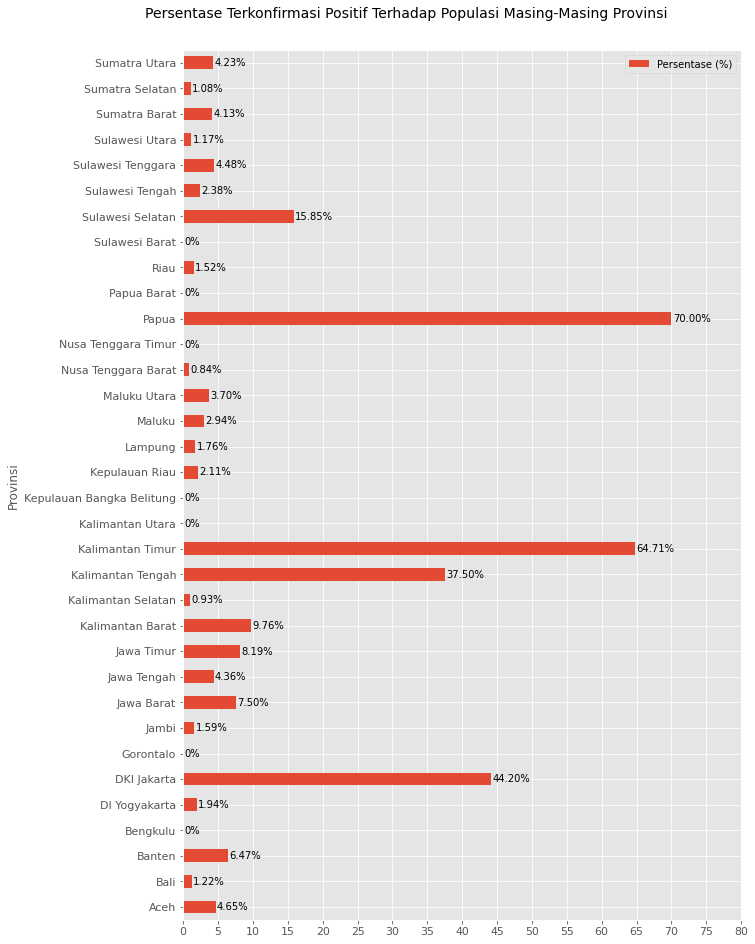

In [147]:
ax = soal4_persentase.plot(kind='barh', figsize=(10, 16), xlabel='Provinsi', ylabel='Persentase (%)')
ax.set_xticks(np.arange(0, 85, 5))

for p in ax.patches:
    x = p.get_x() + p.get_width() + 0.2
    y = p.get_y() + p.get_height()/2 - 0.12
    ax.annotate('{:.2f}%'.format(p.get_width()) if p.get_width() > 0 else "0%", (x, y))

plt.legend(loc="best")
plt.title("Persentase Terkonfirmasi Positif Terhadap Populasi Masing-Masing Provinsi", fontsize=14, y=1.03, x=0.4)
plt.show()


### **Melakukan Sorting Dan Menampilkan Presentase 3 Besar Terkonfirmasi Positif Berdasarkan Provinsi**

In [148]:
soal4_highest = soal4[['Nama Provinsi', 'Persentase (%)']].sort_values(by='Persentase (%)', ascending=False)
soal4_highest.head(3)

,Nama Provinsi,Persentase (%)
23,Papua,70.00
14,Kalimantan Timur,64.71
5,DKI Jakarta,44.20


## **Soal 5 (20 poin)**

Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk
masing-masing pulau.

In [149]:
soal4_pie = soal4[['island', 'confirmed']].copy()
soal4_pie = soal4_pie.groupby(['island'])['confirmed'].sum().reset_index()
soal4_pie.sort_values(by='confirmed', ascending=False, inplace=True)

In [150]:
soal4_pie.head()

,island,confirmed
0,Jawa,911
5,Sulawesi,35
6,Sumatra,29
1,Kalimantan,22
3,Kepulauan Nusa Tenggara,11


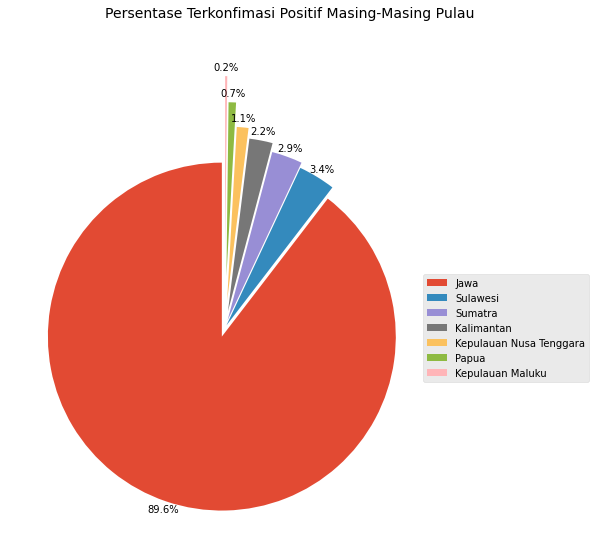

In [151]:
explode_list = [0.05, 0.02, 0.05, 0.1, 0.16, 0.3, 0.45]

ax = soal4_pie['confirmed'].plot(
    kind='pie', figsize=(12, 8), autopct='%1.1f%%', startangle=90,
    pctdistance=1.05, explode=explode_list, labels=None, shadow=False
)

ax.axes.get_yaxis().set_visible(False)

plt.title('Persentase Terkonfimasi Positif Masing-Masing Pulau', y=1.2, x=0.65, fontsize=14)
plt.legend(labels=soal4_pie['island'], loc='center right', bbox_to_anchor=(1.35, 0.5))

plt.show()
